## 1. Load Data

In [1]:
!pip install openpyxl
!pip install squarify

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import squarify
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_excel("/content/online_retail_II.xlsx", engine="openpyxl")

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## 2. Data Discovery

In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


1. Some prices are negative numbers, indicating a refund. The maximum price is 25,111.09, suggesting the presence of outliers, as the 75th percentile is only 4.21.

2. The Customer ID is currently stored as a float. It should be converted to an integer to ensure data integrity.

3. Update the Customer ID naming convention to align with the naming standards used for other columns, ensuring consistency.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


1. Convert Customer ID from float to int.
2. Columns Description and Customer ID have null values.

## 3. Data Cleaning

In [7]:
# check duplicates
df.duplicated().sum()

6865

In [8]:
# display duplicates
# duplicates are those that occur for a second or more times. The first occurance does not display.
df[df.duplicated()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
523258,538035,20728,LUNCH BAG CARS BLUE,3,2010-12-09 13:03:00,1.65,16065.0,United Kingdom
523356,538051,22659,LUNCH BOX I LOVE LONDON,2,2010-12-09 13:24:00,1.95,18041.0,United Kingdom
525170,538155,21907,I'M ON HOLIDAY METAL SIGN,1,2010-12-09 16:52:00,2.10,16907.0,United Kingdom
525293,538166,21915,RED HARMONICA IN BOX,5,2010-12-09 18:09:00,1.25,17965.0,United Kingdom


In [9]:
# remove duplicates
df_no_duplicates = df.drop_duplicates()
print(f"number of rows after removing duplicates: {len(df_no_duplicates)}")
print(f"number of rows before removing duplicates: {len(df)}")

number of rows after removing duplicates: 518596
number of rows before removing duplicates: 525461


In [10]:
# check missing values
df_no_duplicates.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107833
Country,0


In [11]:
# count unique values for Column Description
df["Description"].nunique()

4681

In [12]:
df["Customer ID"].nunique()

4383

In [13]:
# Change Customer ID column name for consistency
df_no_duplicates.rename(columns={"Customer ID": "CustomerID"}, inplace=True)

In [14]:
# convert CustomerID float type to int for data integrity
# if NaN exists, we have to deal with it first.
df_no_duplicates["CustomerID"] = df_no_duplicates["CustomerID"].fillna(-1).astype(int)

In [15]:
# fill null values in the 'Description' column baed on 'Stockcode'
df_no_duplicates["Description"] = df_no_duplicates.groupby("StockCode")[
    "Description"
].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

In [16]:
df_no_duplicates.isnull().sum()

,0
Invoice,0
StockCode,0
Description,365
Quantity,0
InvoiceDate,0
Price,0
CustomerID,0
Country,0


In [17]:
# further fill null values in the 'Description' column with 'No Description'
df_no_duplicates["Description"] = df_no_duplicates["Description"].fillna(
    "No Description"
)

In [18]:
df_no_duplicates["Description"].dtype

dtype('O')

1. For null values in CustomerID, we replace them with '-1' to enable type conversion, as the current type cannot handle null values.

2. For the Description column, we fill missing values by mapping the StockCode to its corresponding description, and set 'No Description' for any remaining null values.

In [19]:
df_no_duplicates.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


# 4. Data Manipulation

In [20]:
# get month
df_no_duplicates["Month"] = df_no_duplicates["InvoiceDate"].dt.month
df_no_duplicates.head()

df_no_duplicates["MonthText"] = (
    df_no_duplicates["InvoiceDate"].dt.month_name().str.slice(stop=3)
)
df_no_duplicates.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,MonthText
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,Dec
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,12,Dec
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,12,Dec


In [21]:
# get week
df_no_duplicates["Week"] = df_no_duplicates["InvoiceDate"].dt.isocalendar().week

In [22]:
# get day of each date
df_no_duplicates["Day"] = df_no_duplicates["InvoiceDate"].dt.day

In [23]:
df_no_duplicates.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,MonthText,Week,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,Dec,49,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec,49,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec,49,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,12,Dec,49,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,12,Dec,49,1


# 5. EDA

## 5.1 Outliers and Anomalies

In [24]:
df_no_duplicates.describe()

,Quantity,InvoiceDate,Price,CustomerID,Month,Week,Day
count,518596.000000,518596,518596.000000,518596.000000,518596.000000,518596.0,518596.000000
mean,10.438152,2010-06-28 06:43:01.573016320,4.716176,12160.895846,7.433856,30.175032,15.250578
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,-1.000000,1.000000,1.0,1.000000
25%,1.000000,2010-03-21 11:07:00,1.250000,12747.000000,4.000000,17.0,8.000000
50%,3.000000,2010-07-05 15:42:00,2.100000,14606.000000,8.000000,33.0,15.000000
75%,10.000000,2010-10-15 11:40:00,4.210000,16441.000000,11.000000,44.0,23.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,12.000000,52.0,31.000000
std,108.126593,NaN,147.090460,6408.558330,3.543857,15.356281,8.698070


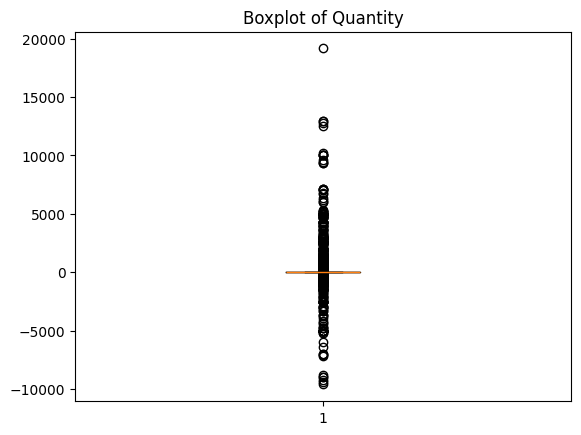

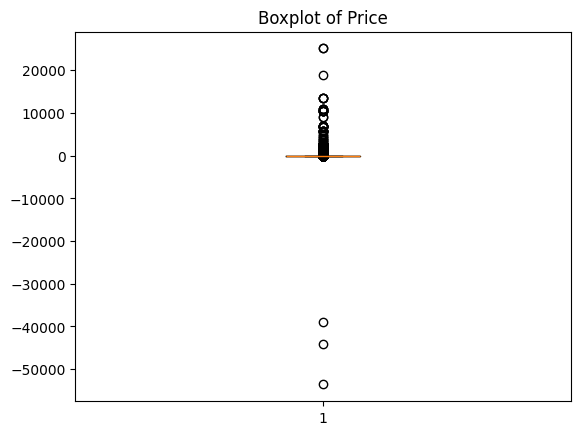

In [25]:
plt.boxplot(df_no_duplicates["Quantity"])
plt.title("Boxplot of Quantity")
plt.show()

plt.boxplot(df_no_duplicates["Price"])
plt.title("Boxplot of Price")
plt.show()

## 5.2 Sales Trend by Time

In [26]:
df_no_duplicates["Sales"] = df_no_duplicates["Quantity"] * df_no_duplicates["Price"]

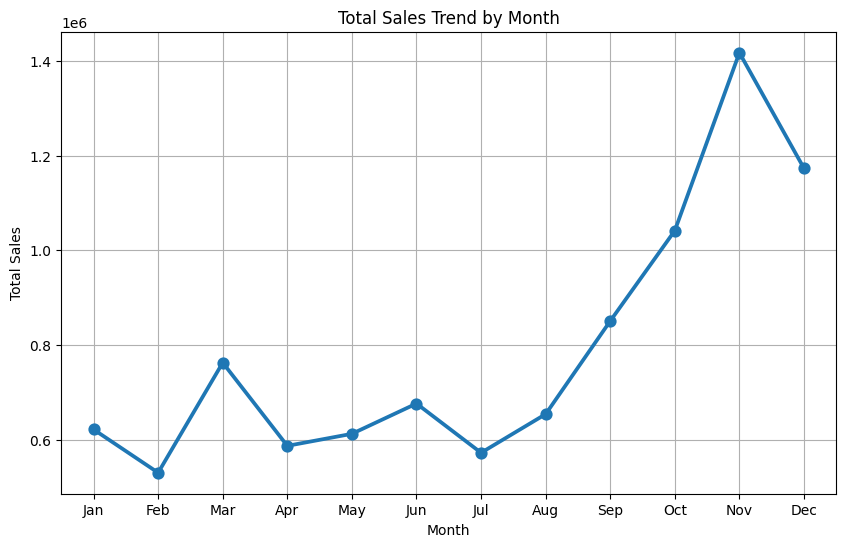

In [27]:
# Sales trend by month

months = df_no_duplicates.groupby("Month")["Sales"].sum().index
sales = df_no_duplicates.groupby(["Month"])["Sales"].sum().values

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

plt.figure(figsize=(10, 6))
sns.pointplot(x=months, y=sales)  # Use seaborn's pointplot
plt.title("Total Sales Trend by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

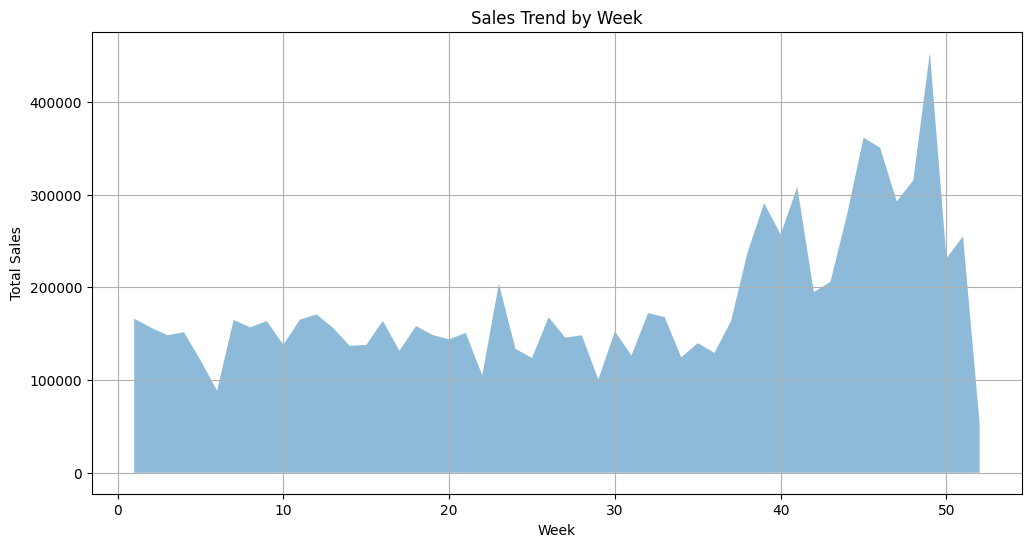

In [28]:
# plot sales trend by week

weeks = df_no_duplicates.groupby("Week")["Sales"].sum().index
sales_by_week = df_no_duplicates.groupby(["Week"])["Sales"].sum().values

plt.figure(figsize=(12, 6))
plt.fill_between(weeks, sales_by_week, alpha=0.5)  # Use fill_between for area plot
plt.title("Sales Trend by Week")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

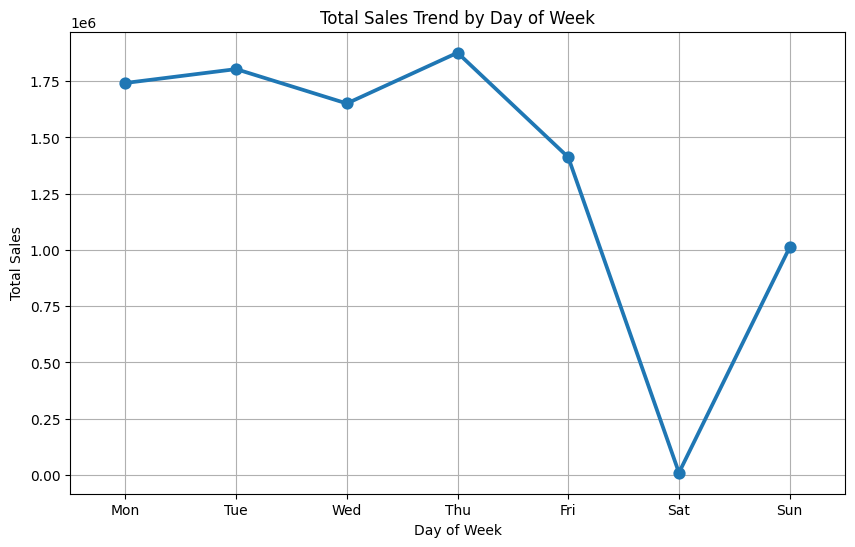

In [29]:
# plot sales trend by day of week
df_no_duplicates["DayOfWeek"] = df_no_duplicates["InvoiceDate"].dt.dayofweek
day_of_week_sales = df_no_duplicates.groupby("DayOfWeek")["Sales"].sum()
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(10, 6))
sns.pointplot(x=days, y=day_of_week_sales.values)  # Use seaborn's pointplot
plt.title("Total Sales Trend by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

1. The highest sales occur between September and December, peaking in November.

2. The week with the largest sales is week 49, just before the Christmas holiday.

3. Customers make the fewest purchases on weekends, with almost no sales on Saturdays.

## 5.3 Sales by Product

In [30]:
df_no_duplicates.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,MonthText,Week,Day,Sales,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,Dec,49,1,83.4,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec,49,1,81.0,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec,49,1,81.0,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,12,Dec,49,1,100.8,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,12,Dec,49,1,30.0,1


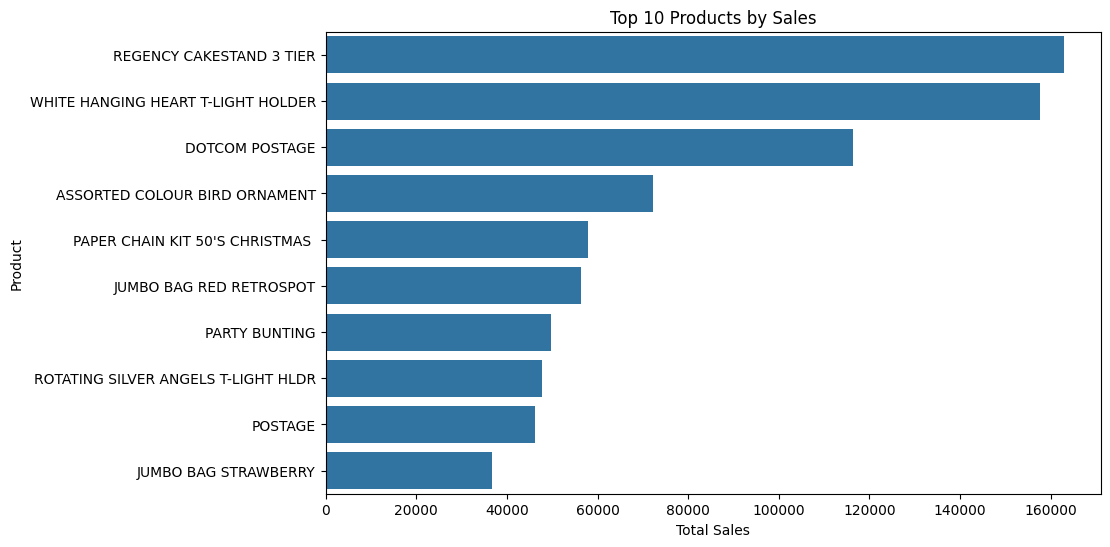

In [31]:
# top 10 products by sales
plt.figure(figsize=(10, 6))
product_sales = (
    df_no_duplicates.groupby("Description")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
sns.barplot(y="Description", x="Sales", data=product_sales, orient="h")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

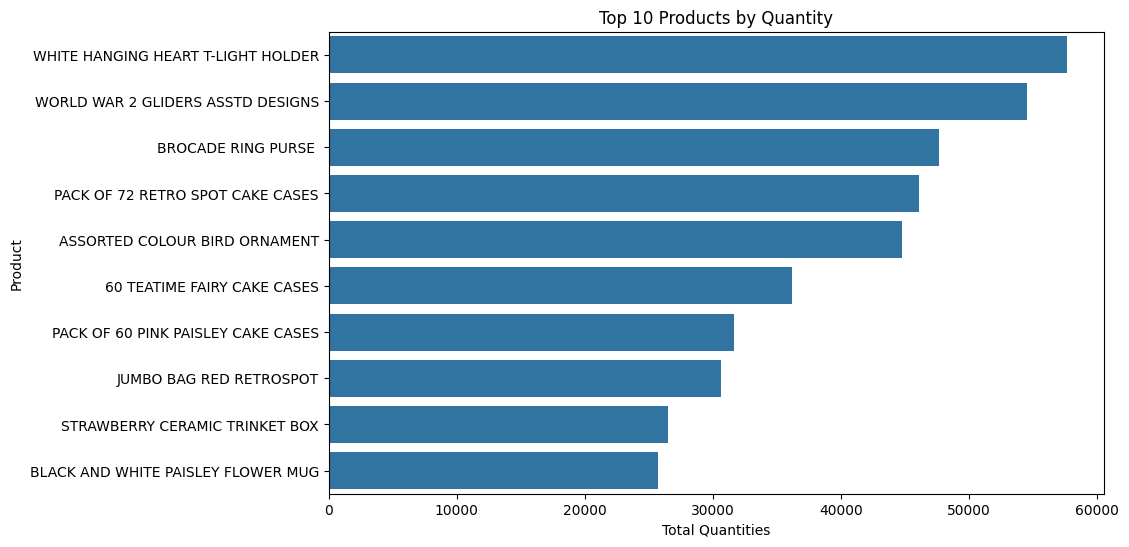

In [32]:
# top 10 products by quantities
plt.figure(figsize=(10, 6))
product_quantities = (
    df_no_duplicates.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
sns.barplot(y="Description", x="Quantity", data=product_quantities, orient="h")
plt.title("Top 10 Products by Quantity")
plt.xlabel("Total Quantities")
plt.ylabel("Product")
plt.show()

In [33]:
# overlapping products
product_sales_quantity = pd.merge(
    product_sales,
    product_quantities,
    on="Description",
    suffixes=("_sales", "_quantity"),
)
product_sales_quantity

,Description,Sales,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,157580.28,57632
1,ASSORTED COLOUR BIRD ORNAMENT,72251.32,44805
2,JUMBO BAG RED RETROSPOT,56329.56,30668


In [34]:
# percentage of 10 top products accounting for the total sales
total_sales = df_no_duplicates["Sales"].sum()
top_10_sales = product_sales["Sales"].sum()
percentage_top_10_sales = (top_10_sales / total_sales) * 100
percentage_top_10_sales

8.45051184505328

1. We found that the top 10 products by sales and by quantity are different, with three products appearing in both lists.

2. The top 10 products by sales account for 10.46% of total sales.

## 5.4 Sales by Country

In [35]:
# sales_by_country
sales_by_country = (
    df_no_duplicates.groupby("Country")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

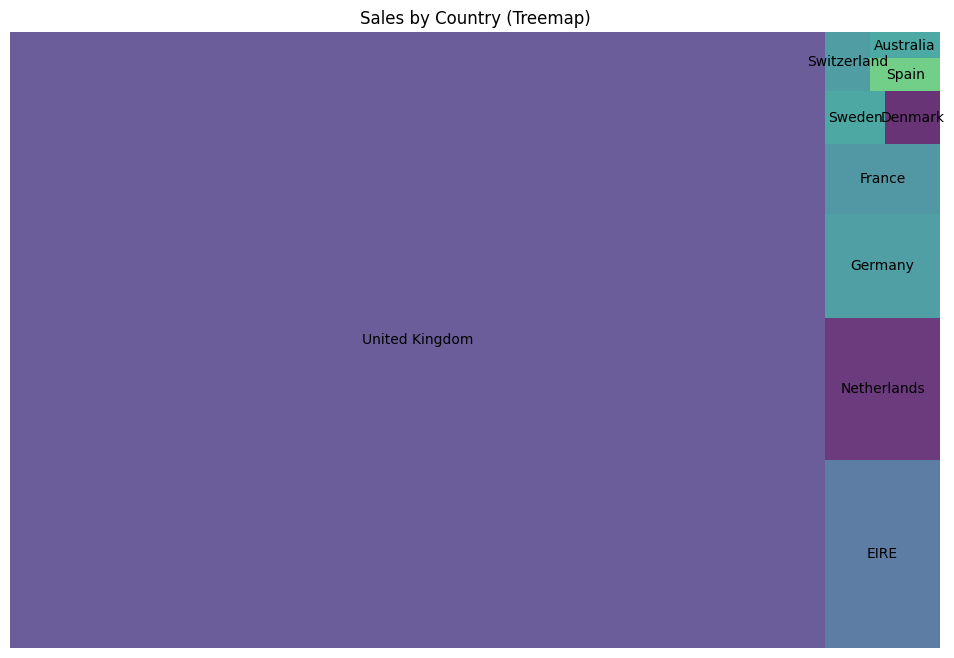

In [36]:
# top 10 countries by sales
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=sales_by_country["Sales"].head(10),
    label=sales_by_country["Country"].head(10),
    alpha=0.8,
)
plt.title("Sales by Country (Treemap)")
plt.axis("off")
plt.show()


In [37]:
# top 10 products for top 5 countries
top_5_countries = sales_by_country.head(5)["Country"].tolist()

In [38]:
# top products by sale in each of those 5 countries
top_products_by_country = (
    df_no_duplicates[df_no_duplicates["Country"].isin(top_5_countries)]
    .groupby(["Country", "Description"])["Sales"]
    .sum()
    .reset_index()
    .groupby("Country")
    .apply(lambda x: x.sort_values("Sales", ascending=False).head(5))
    .reset_index(drop=True)
)
top_products_by_country

<ipython-input-38-41cb87b96c84>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("Sales", ascending=False).head(5))


,Country,Description,Sales
0,EIRE,REGENCY CAKESTAND 3 TIER,7524.90
1,EIRE,SET/5 RED SPOTTY LID GLASS BOWLS,4930.40
2,EIRE,CARRIAGE,4765.00
3,EIRE,PLEASE ONE PERSON METAL SIGN,3270.00
4,EIRE,COOK WITH WINE METAL SIGN,3238.56
5,France,POSTAGE,9442.00
6,France,Manual,3964.95
7,France,RED TOADSTOOL LED NIGHT LIGHT,2427.15
8,France,ROUND SNACK BOXES SET OF4 WOODLAND,1820.10
9,France,ASSORTED COLOUR BIRD ORNAMENT,1453.12


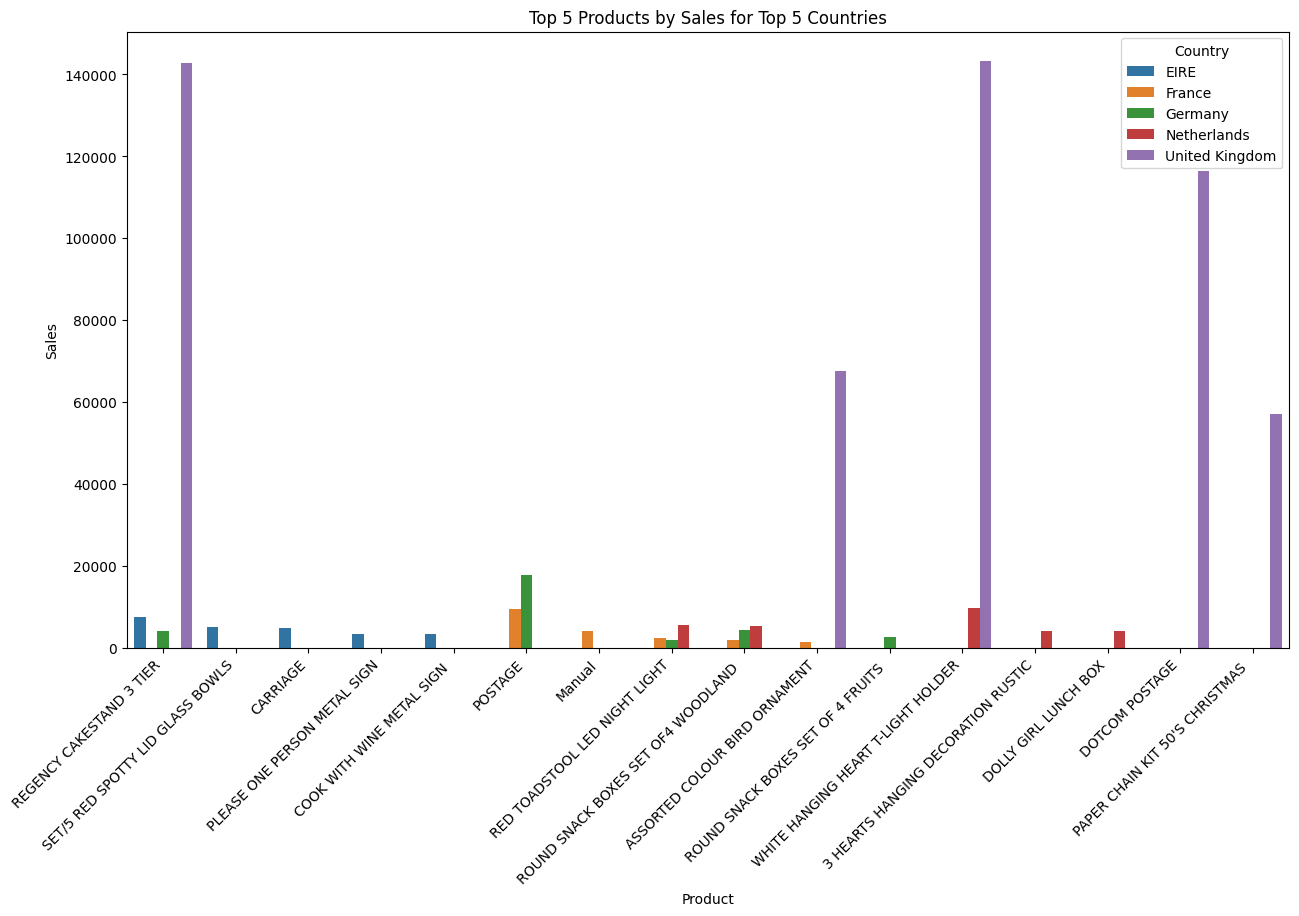

In [39]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Description", y="Sales", hue="Country", data=top_products_by_country)
plt.title("Top 5 Products by Sales for Top 5 Countries")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha="right")
plt.show()

In [40]:
# orders by country
orders_by_country = df_no_duplicates["Country"].value_counts()
orders_by_country

,count
Country,
United Kingdom,479047
EIRE,9660
Germany,8120
France,5754
Netherlands,2768
Spain,1271
Switzerland,1187
Portugal,1098
Belgium,1053


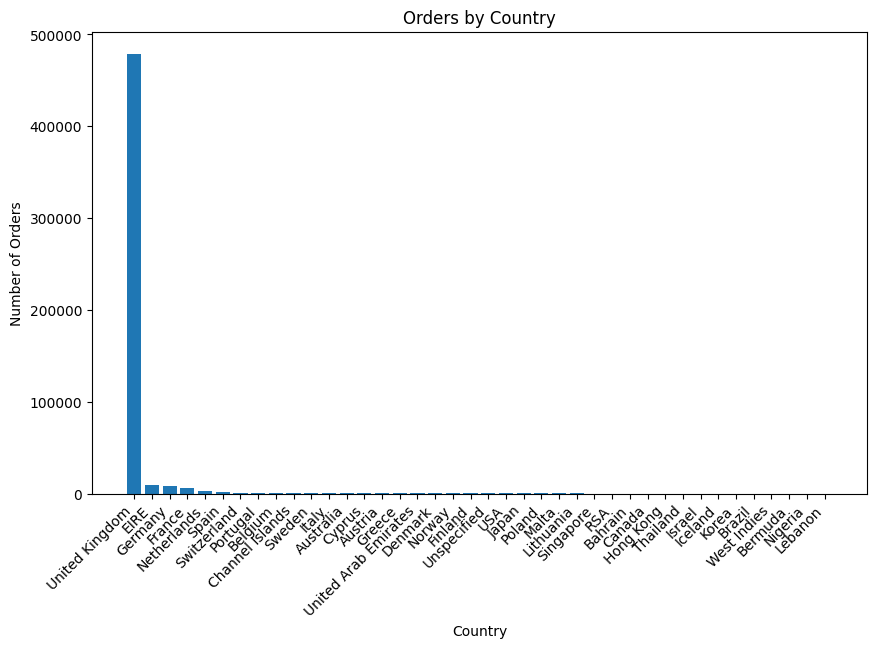

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(orders_by_country.index, orders_by_country.values)
plt.title("Orders by Country")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha="right")
plt.show()

1. The UK accounts for the largest portion of sales, followed by EIRE, the Netherlands, Germany, and France.

2. Each country has a distinct set of top products by sales, highlighting the potential for personalized marketing.

3. Orders are positively correlated with sales.

## 5.5 Customers Behavior

In [42]:
# the top 10 customers by sales
top_10_customers = (
    df_no_duplicates.groupby("CustomerID")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(11)
    .reset_index()
)
top_10_customers[top_10_customers["CustomerID"] != -1]

,CustomerID,Sales
1,18102,341776.73
2,14646,243853.05
3,14156,183163.55
4,14911,137710.76
5,13694,128172.42
6,17511,83760.60
7,15061,82162.74
8,16684,75610.17
9,13089,55801.73
10,16754,54558.18


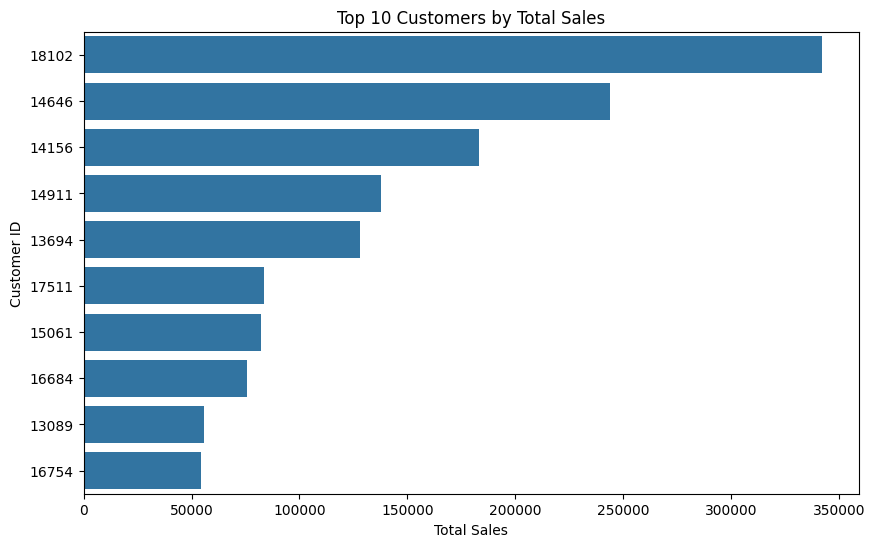

In [43]:
# Plotting the top 10 customers by sales
top_10_customers["CustomerID"] = top_10_customers["CustomerID"].astype("str")
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Sales",
    y="CustomerID",
    data=top_10_customers[top_10_customers["CustomerID"] != "-1"]
    .sort_values("Sales", ascending=False)
    .reset_index(),
    orient="h",
)
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.show()

In [44]:
# Top 10 customers by sales with quantities
top_10_sales_customers = (
    df_no_duplicates.groupby("CustomerID")
    .agg({"Sales": "sum", "Quantity": "sum"})
    .sort_values(by="Sales", ascending=False)
    .head(10)
    .reset_index()
)
top_10_sales_customers = top_10_sales_customers[
    top_10_sales_customers["CustomerID"] != -1
]

In [45]:
# Display the results
print("Top 10 Customers by Sales with Quantities:")
display(top_10_sales_customers)

Top 10 Customers by Sales with Quantities:


,CustomerID,Sales,Quantity
1,18102,341776.73,122988
2,14646,243853.05,168501
3,14156,183163.55,106883
4,14911,137710.76,66572
5,13694,128172.42,123639
6,17511,83760.60,54901
7,15061,82162.74,51395
8,16684,75610.17,51705
9,13089,55801.73,28422


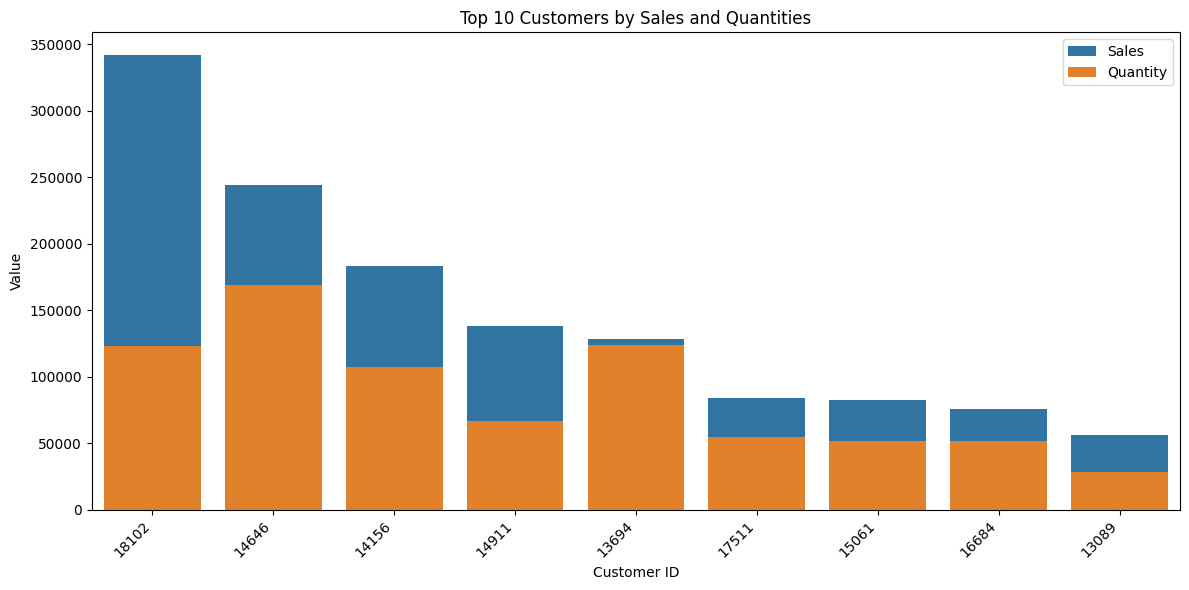

In [46]:
# Plotting the top 10 customers by sales and quantities
top_10_sales_customers["CustomerID"] = top_10_sales_customers["CustomerID"].astype(
    "str"
)

plt.figure(figsize=(12, 6))

sns.barplot(x="CustomerID", y="Sales", data=top_10_sales_customers, label="Sales")

sns.barplot(x="CustomerID", y="Quantity", data=top_10_sales_customers, label="Quantity")

plt.title("Top 10 Customers by Sales and Quantities")
plt.xlabel("Customer ID")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()

In [47]:
# create year-month for customer consumption trending analysis
df_no_duplicates["YearMonth"] = df_no_duplicates["InvoiceDate"].dt.to_period("M")
df_no_duplicates.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,MonthText,Week,Day,Sales,DayOfWeek,YearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,12,Dec,49,1,83.4,1,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec,49,1,81.0,1,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,12,Dec,49,1,81.0,1,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,12,Dec,49,1,100.8,1,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,12,Dec,49,1,30.0,1,2009-12


In [48]:
df_no_duplicates_top_10_customers = df_no_duplicates[
    df_no_duplicates["CustomerID"].isin(top_10_customers["CustomerID"].astype("int"))
]
df_no_duplicates_top_10_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Month,MonthText,Week,Day,Sales,DayOfWeek,YearMonth
54,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102,United Kingdom,12,Dec,49,1,27.44,1,2009-12
55,489438,21252,SET OF MEADOW FLOWER STICKERS,30,2009-12-01 09:24:00,1.69,18102,United Kingdom,12,Dec,49,1,50.70,1,2009-12
56,489438,21100,CHARLIE AND LOLA CHARLOTTE BAG,30,2009-12-01 09:24:00,1.15,18102,United Kingdom,12,Dec,49,1,34.50,1,2009-12
57,489438,21033,JUMBO BAG CHARLIE AND LOLA TOYS,30,2009-12-01 09:24:00,2.00,18102,United Kingdom,12,Dec,49,1,60.00,1,2009-12
58,489438,20711,JUMBO BAG TOYS,60,2009-12-01 09:24:00,1.30,18102,United Kingdom,12,Dec,49,1,78.00,1,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525231,538159,21324,HANGING MEDINA LANTERN SMALL,-18,2010-12-09 17:17:00,0.00,-1,United Kingdom,12,Dec,49,9,-0.00,3,2010-12
525232,538158,20892,SET/3 TALL GLASS CANDLE HOLDER PINK,-32,2010-12-09 17:17:00,0.00,-1,United Kingdom,12,Dec,49,9,-0.00,3,2010-12
525233,538160,20956,PORCELAIN T-LIGHT HOLDERS ASSORTED,288,2010-12-09 17:18:00,0.00,-1,United Kingdom,12,Dec,49,9,0.00,3,2010-12
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,-1,United Kingdom,12,Dec,49,9,-0.00,3,2010-12


In [49]:
# customer sales over time
df_no_duplicates_top_10_customers = df_no_duplicates[
    df_no_duplicates["CustomerID"].astype("str").isin(top_10_customers["CustomerID"])
]
customer_sales_over_time = (
    df_no_duplicates_top_10_customers.groupby(["CustomerID", "YearMonth"])["Sales"]
    .sum()
    .reset_index()
)
customer_sales_over_time

,CustomerID,YearMonth,Sales
0,-1,2009-12,136523.40
1,-1,2010-01,92042.99
2,-1,2010-02,43668.94
3,-1,2010-03,129827.93
4,-1,2010-04,29918.86
...,...,...,...
129,18102,2010-08,46516.39
130,18102,2010-09,-162.00
131,18102,2010-10,29575.64
132,18102,2010-11,22092.51


In [50]:
# plot top 10 customers purchase trend
customer_sales_over_time["YearMonth"] = customer_sales_over_time["YearMonth"].astype(
    str
)
customer_sales_over_time["CustomerID"] = customer_sales_over_time["CustomerID"].astype(
    str
)  # sns treats hue as numerical values

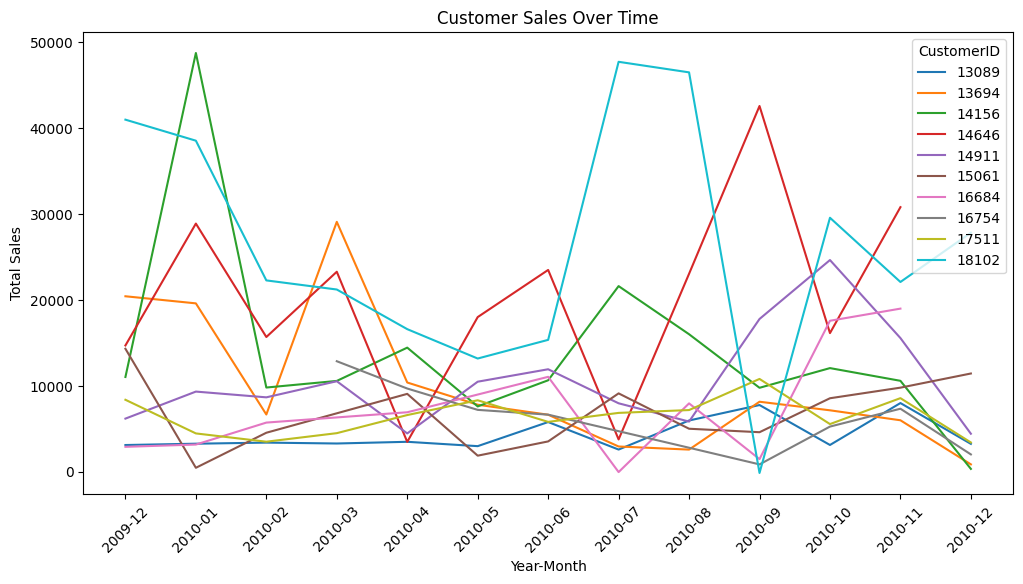

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="YearMonth",
    y="Sales",
    hue="CustomerID",
    data=customer_sales_over_time[customer_sales_over_time["CustomerID"] != "-1"],
)
plt.title("Customer Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [52]:
top_10_customers = df_no_duplicates_top_10_customers[
    df_no_duplicates_top_10_customers["CustomerID"] != -1
]
top_10_customers_summary = (
    top_10_customers.groupby("CustomerID")
    .agg({"Sales": "sum", "Invoice": "count"})
    .sort_values(by="Sales", ascending=False)
    .reset_index()
)
top_10_customers_country = (
    top_10_customers.groupby("CustomerID")["Country"]
    .apply(lambda x: x.mode()[0])
    .reset_index()
)
top_10_customers_summary = pd.merge(
    top_10_customers_summary, top_10_customers_country, on="CustomerID"
)
top_10_customers_summary.rename(columns={"Invoice": "PurchaseFrequency"}, inplace=True)
top_10_customers_summary

,CustomerID,Sales,PurchaseFrequency,Country
0,18102,341776.73,635,United Kingdom
1,14646,243853.05,1805,Netherlands
2,14156,183163.55,2708,EIRE
3,14911,137710.76,5707,EIRE
4,13694,128172.42,973,United Kingdom
5,17511,83760.60,1058,United Kingdom
6,15061,82162.74,588,United Kingdom
7,16684,75610.17,468,United Kingdom
8,13089,55801.73,1579,United Kingdom
9,16754,54558.18,165,United Kingdom


1. We identified the top 10 customers, and found a positive correlation between their purchasing power and quantities.

2. Throughout the year, the top customers do not exhibit any clear seasonal purchasing patterns.

3. Eight of the top 10 customers are from the UK, with the second-largest customer hailing from the Netherlands.

## 6. Customer Segmentation - Clustering

In [53]:
# Calculate Recency
recent_date = df_no_duplicates["InvoiceDate"].max()
df_no_duplicates["Recency"] = (recent_date - df_no_duplicates["InvoiceDate"]).dt.days

In [54]:
# Calculate Frequency and MonetaryValue
customer_rfm = df_no_duplicates.groupby("CustomerID").agg(
    {
        "InvoiceDate": lambda x: (recent_date - x.max()).days,
        "Invoice": "nunique",
        "Sales": "sum",
    }
)
customer_rfm.columns = ["Recency", "Frequency", "MonetaryValue"]
customer_rfm = customer_rfm[customer_rfm.index != -1]


In [55]:
# Assign RFM scores (1-4) based on quantiles
quantiles = customer_rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()


def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


customer_rfm["R"] = customer_rfm["Recency"].apply(RScore, args=("Recency", quantiles))
customer_rfm["F"] = customer_rfm["Frequency"].apply(
    FMScore, args=("Frequency", quantiles)
)
customer_rfm["M"] = customer_rfm["MonetaryValue"].apply(
    FMScore, args=("MonetaryValue", quantiles)
)

customer_rfm["RFMGroup"] = (
    customer_rfm.R.map(str) + customer_rfm.F.map(str) + customer_rfm.M.map(str)
)
customer_rfm["RFMScore"] = customer_rfm[["R", "F", "M"]].sum(axis=1)

In [56]:
# Select the RFM features for clustering
rfm_data = customer_rfm[["Recency", "Frequency", "MonetaryValue"]]

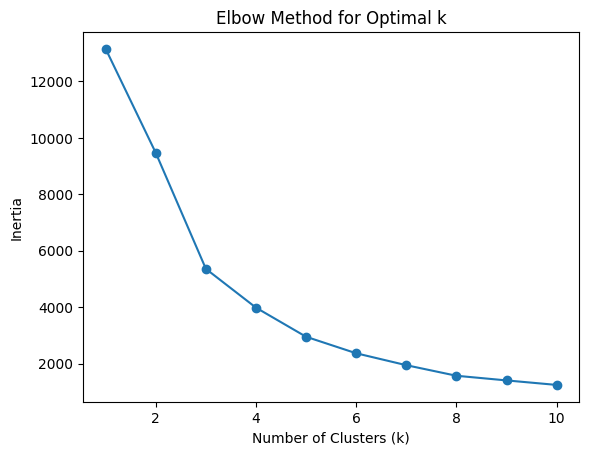

In [57]:
scaler = StandardScaler()
scaled_rfm_data = scaler.fit_transform(rfm_data)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_rfm_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [58]:
# Based on the Elbow method, choose the optimal k value (e.g., k=3)
# Apply KMeans clustering with the chosen k
kmeans = KMeans(n_clusters=3, random_state=42)
customer_rfm["Cluster"] = kmeans.fit_predict(scaled_rfm_data)

In [59]:
# Analyze the characteristics of each cluster
cluster_means = customer_rfm.groupby("Cluster")[
    ["Recency", "Frequency", "MonetaryValue"]
].mean()
print(cluster_means)

            Recency   Frequency  MonetaryValue
Cluster                                       
0         40.452134    5.963110     1932.39489
1        242.379945    1.896964      402.63281
2          3.250000  122.875000    96183.65500


In [60]:
# Analyze the characteristics of each cluster in more detail.
cluster_analysis = customer_rfm.groupby("Cluster").agg(
    {
        "Recency": ["mean", "median", "min", "max"],
        "Frequency": ["mean", "median", "min", "max"],
        "MonetaryValue": ["mean", "median", "min", "max"],
    }
)
print(cluster_analysis)

            Recency                    Frequency                  \
               mean median  min  max        mean median min  max   
Cluster                                                            
0         40.452134   30.0    0  146    5.963110    4.0   1   81   
1        242.379945  233.0  135  373    1.896964    1.0   1   13   
2          3.250000    2.0    0    9  122.875000  117.0  42  270   

        MonetaryValue                                  
                 mean     median       min        max  
Cluster                                                
0          1932.39489    913.505  -3767.20   75610.17  
1           402.63281    266.050 -25111.09   30411.26  
2         96183.65500  54917.470  18036.76  341776.73  


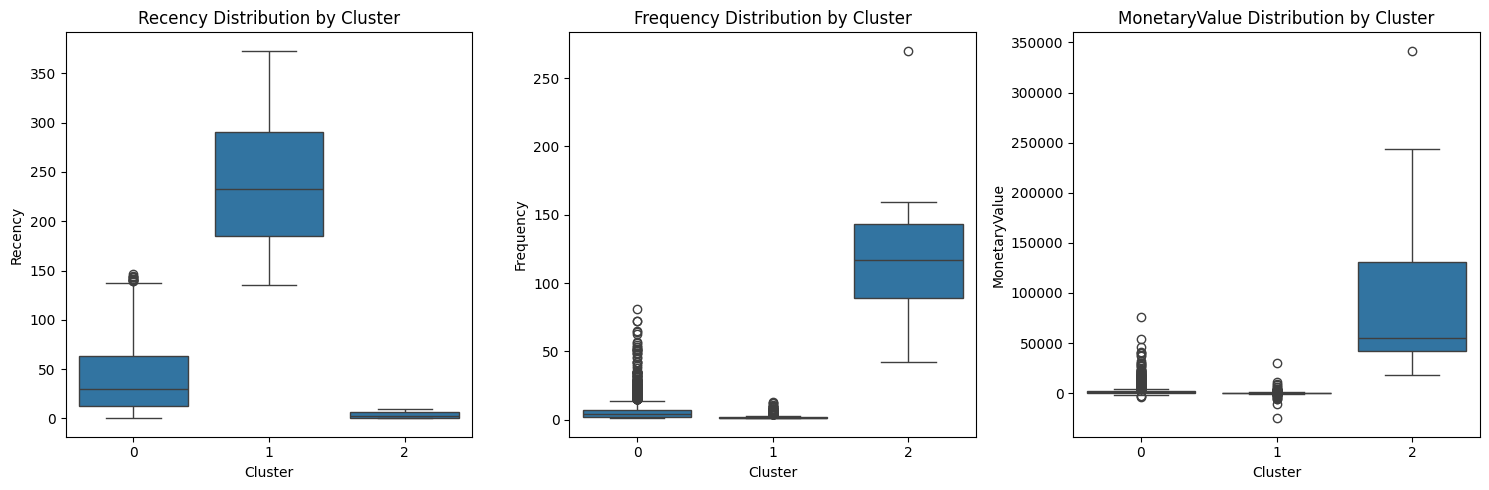

In [61]:
# Visualize cluster characteristics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Cluster", y="Recency", data=customer_rfm)
plt.title("Recency Distribution by Cluster")

plt.subplot(1, 3, 2)
sns.boxplot(x="Cluster", y="Frequency", data=customer_rfm)
plt.title("Frequency Distribution by Cluster")

plt.subplot(1, 3, 3)
sns.boxplot(x="Cluster", y="MonetaryValue", data=customer_rfm)
plt.title("MonetaryValue Distribution by Cluster")

plt.tight_layout()
plt.show()

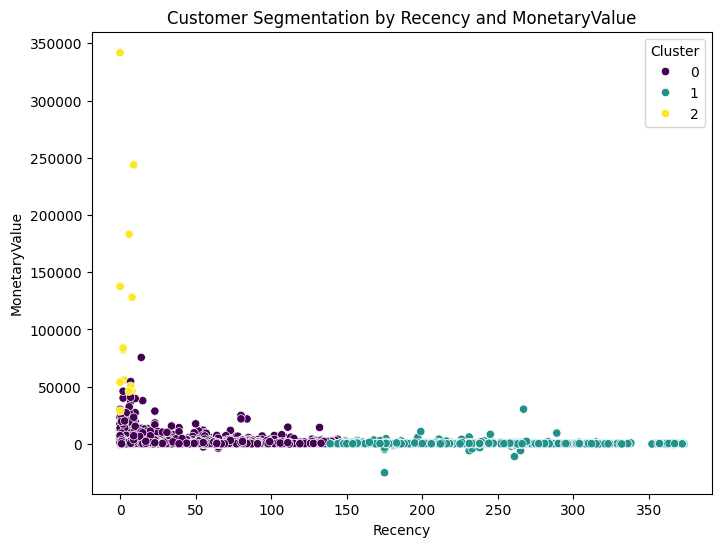

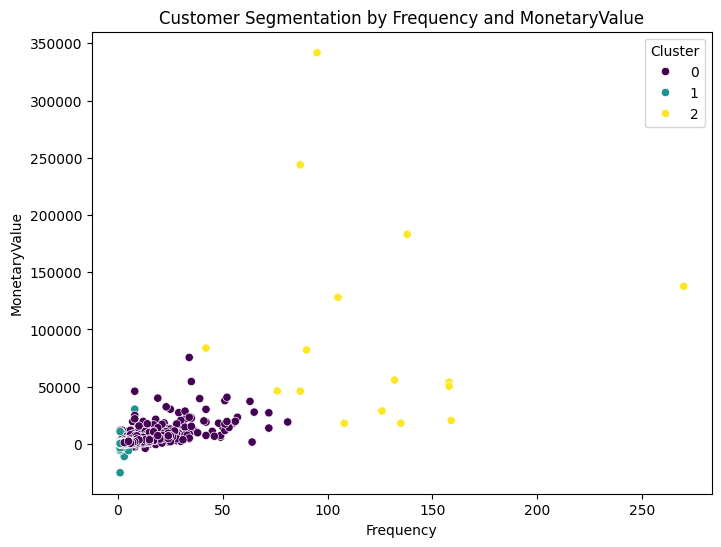

In [62]:
# Visualize the distribution of the three clusters.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Recency", y="MonetaryValue", hue="Cluster", data=customer_rfm, palette="viridis"
)
plt.title("Customer Segmentation by Recency and MonetaryValue")
plt.xlabel("Recency")
plt.ylabel("MonetaryValue")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Frequency",
    y="MonetaryValue",
    hue="Cluster",
    data=customer_rfm,
    palette="viridis",
)
plt.title("Customer Segmentation by Frequency and MonetaryValue")
plt.xlabel("Frequency")
plt.ylabel("MonetaryValue")
plt.show()

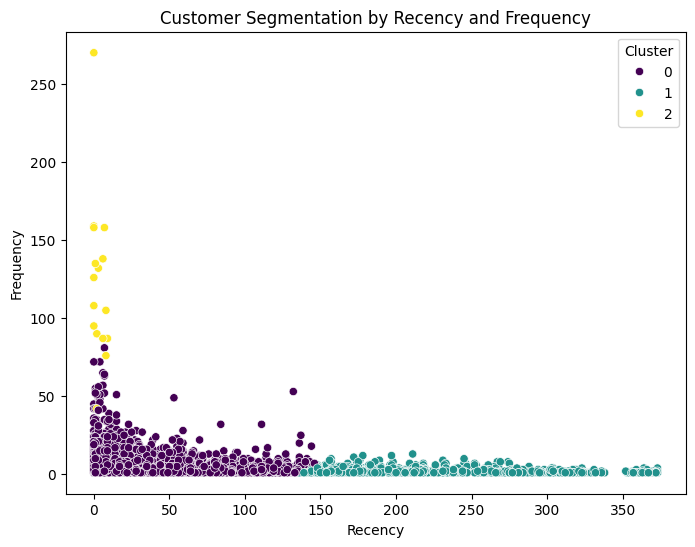

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Recency", y="Frequency", hue="Cluster", data=customer_rfm, palette="viridis"
)
plt.title("Customer Segmentation by Recency and Frequency")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.show()

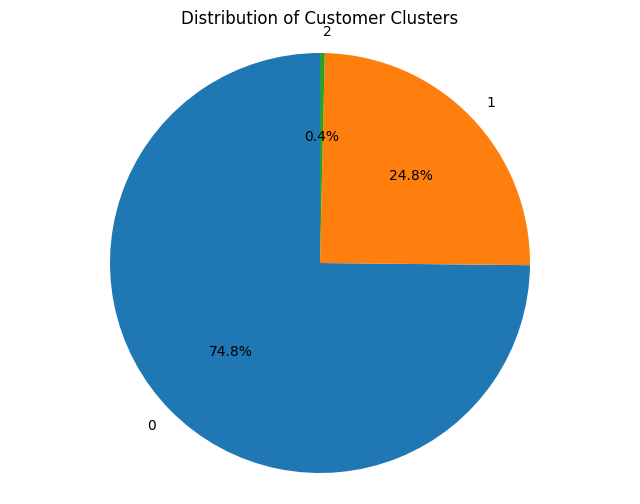

In [64]:
# Count the occurrences of each cluster
cluster_counts = customer_rfm["Cluster"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Customer Clusters")
plt.axis("equal")
plt.show()


In [65]:
# Analyze sales trends within each cluster over time
cluster_sales_over_time = (
    df_no_duplicates.merge(customer_rfm, on="CustomerID", how="left")
    .groupby(["Cluster", "YearMonth"])["Sales"]
    .sum()
    .reset_index()
)
cluster_sales_over_time["YearMonth"] = cluster_sales_over_time[
    "YearMonth"
].dt.to_timestamp()

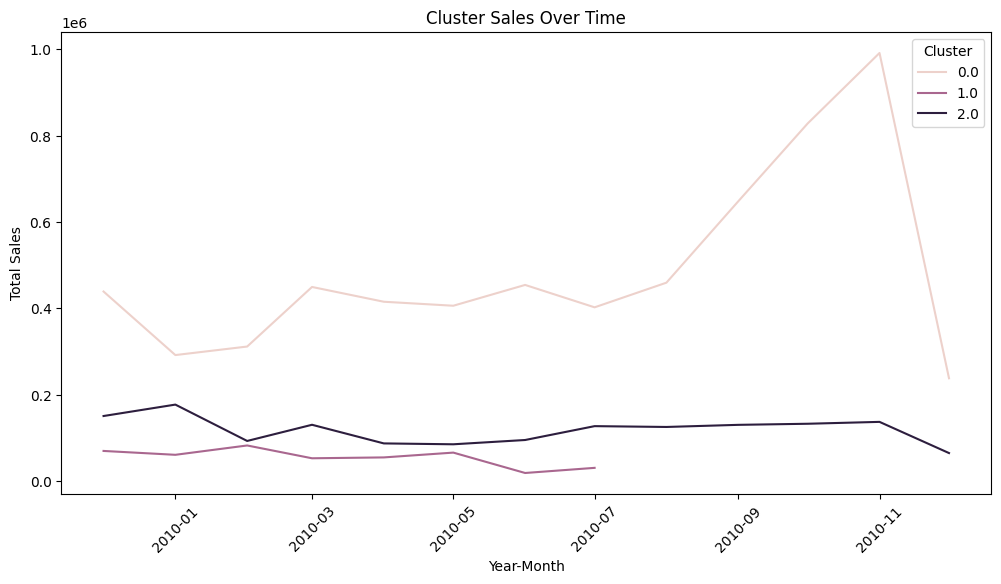

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="Sales", hue="Cluster", data=cluster_sales_over_time)
plt.title("Cluster Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [67]:
# Investigate the top products purchased by each cluster.
top_products_by_cluster = (
    df_no_duplicates.merge(customer_rfm, on="CustomerID")
    .groupby(["Cluster", "Description"])["Sales"]
    .sum()
    .reset_index()
    .groupby("Cluster")
    .apply(lambda x: x.sort_values("Sales", ascending=False).head(5))
    .reset_index(drop=True)
)
print(top_products_by_cluster)

    Cluster                         Description      Sales
0         0  WHITE HANGING HEART T-LIGHT HOLDER  118215.99
1         0            REGENCY CAKESTAND 3 TIER   84562.05
2         0       ASSORTED COLOUR BIRD ORNAMENT   55590.84
3         0             JUMBO BAG RED RETROSPOT   44293.95
4         0                             POSTAGE   40202.23
5         1  WHITE HANGING HEART T-LIGHT HOLDER    8231.15
6         1                             POSTAGE    4739.60
7         1          VINTAGE UNION JACK BUNTING    3408.50
8         1     SMALL FAIRY CAKE FRIDGE MAGNETS    2836.80
9         1      STRAWBERRY CERAMIC TRINKET BOX    2775.52
10        2            REGENCY CAKESTAND 3 TIER   49582.35
11        2  WHITE HANGING HEART T-LIGHT HOLDER   22144.37
12        2        VINTAGE UNION JACK MEMOBOARD   16918.69
13        2             CREAM HEART CARD HOLDER   15228.91
14        2             BLACK HEART CARD HOLDER   14563.03


<ipython-input-67-8e04400466ac>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("Sales", ascending=False).head(5))


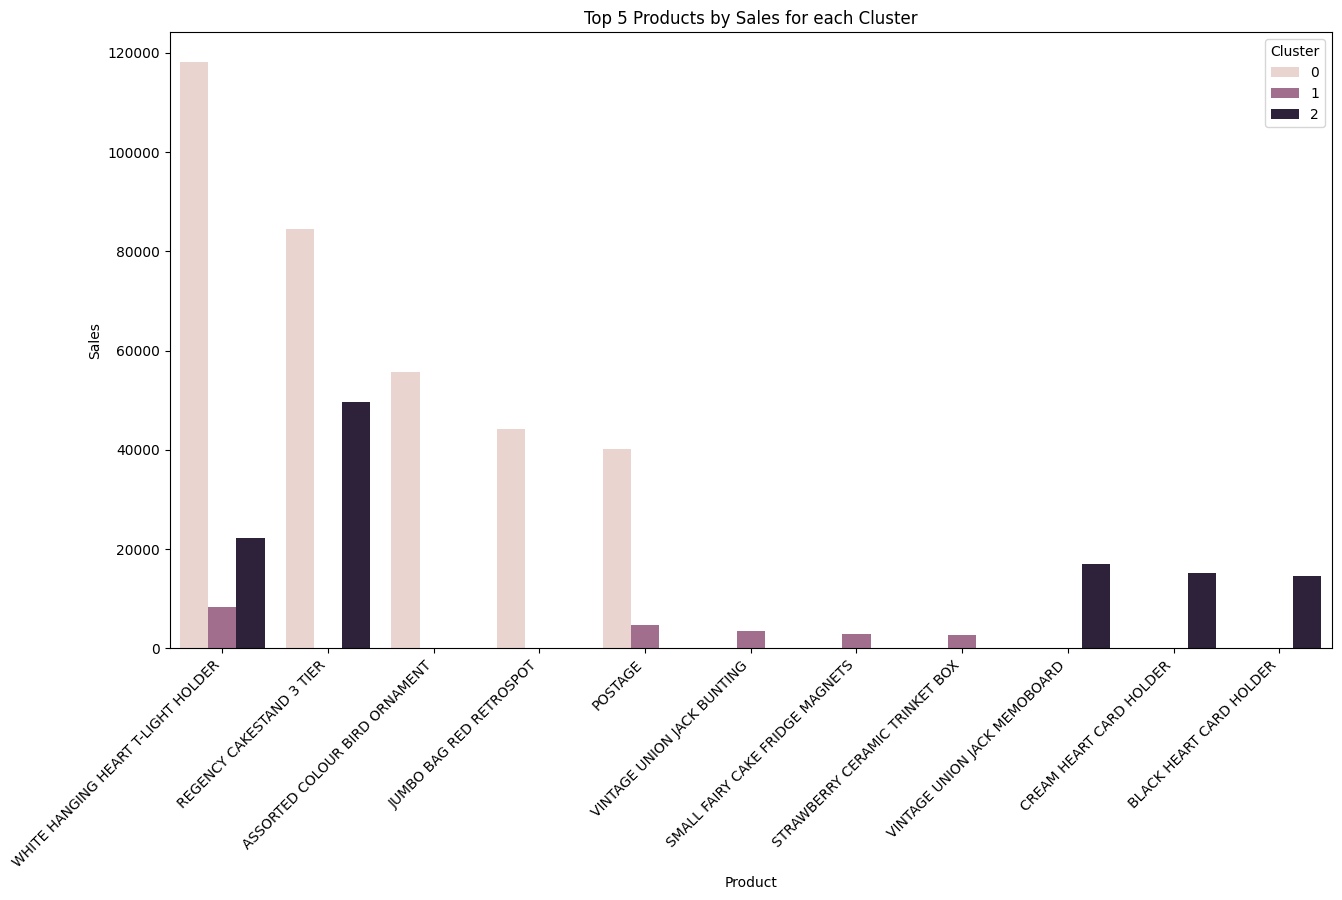

In [68]:
# Visualize top products per cluster
plt.figure(figsize=(15, 8))
sns.barplot(x="Description", y="Sales", hue="Cluster", data=top_products_by_cluster)
plt.title("Top 5 Products by Sales for each Cluster")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha="right")
plt.show()

1. There are three clusters. Cluster 2 has the highest monetary value with the shortest recency, but the least frequency. Cluster 1 has the lowest monetary value, the longest recency, and an average frequency of 1, indicating only one purchase. Interestingly, this cluster ceased purchasing in July 2020. Further investigation is needed to understand the reasons behind this.

2. The high-value Cluster 2 maintains a stable purchasing pattern through the year, while Cluster 1 shows a seasonal increase starting in August 2010, peaking in November 2010. Although their average purchase amount is not the highest, their total spend accounts for the majority of sales.

3. We also found that the three clusters have different product preferences, which highlights the potential for targeted marketing.

## 7. Cohort Analysis

In [69]:
# Create a 'CohortMonth' column representing the month of the customer's first purchase
df_no_duplicates["CohortMonth"] = (
    df_no_duplicates.groupby("CustomerID")["InvoiceDate"]
    .transform("min")
    .dt.to_period("M")
)

In [70]:
# Create a 'CohortIndex' column representing the number of months since the customer's first purchase
df_no_duplicates["CohortIndex"] = (
    df_no_duplicates["InvoiceDate"].dt.to_period("M") - df_no_duplicates["CohortMonth"]
).apply(lambda x: x.n)


In [71]:
# Create a cohort table showing the number of unique customers per cohort and index
cohort_table = (
    df_no_duplicates.groupby(["CohortMonth", "CohortIndex"])["CustomerID"]
    .nunique()
    .reset_index()
)
cohort_table = cohort_table.pivot(
    index="CohortMonth", columns="CohortIndex", values="CustomerID"
)

In [72]:
# Calculate retention rate
cohort_size = cohort_table.iloc[
    :, 0
]  # Size of each cohort (customers in the first month)
retention_rate = cohort_table.divide(cohort_size, axis=0)

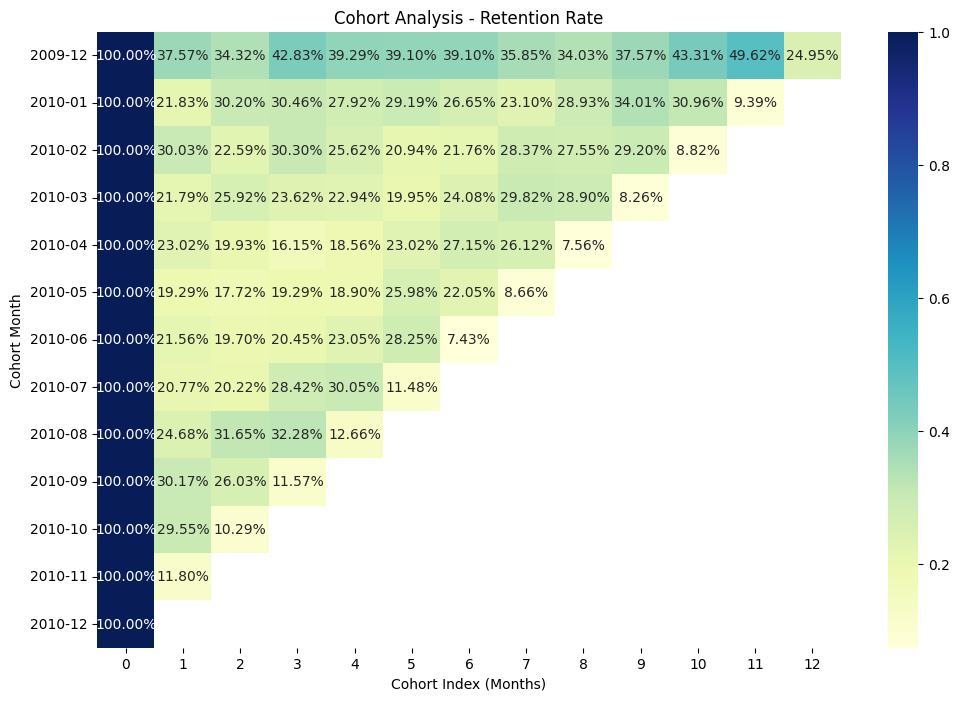

In [73]:
# Visualize retention rate using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Cohort Analysis - Retention Rate")
plt.xlabel("Cohort Index (Months)")
plt.ylabel("Cohort Month")
plt.show()


1. Retention declines over time across all cohorts, with a sharp drop after the first month, then stabilizing at lower levels.

2. The December 2009 cohort stands out for maintaining high retention and even seeing an increase after month 9, suggesting successful re-engagement efforts.

3. In contrast, cohorts from mid-to-late 2010, particularly November, exhibit poor long-term retention, with a steep drop in second-month retention.

4. Next steps include analyzing the success of December 2009, investigating mid-2010 changes, and enhancing early engagement and re-engagement efforts.